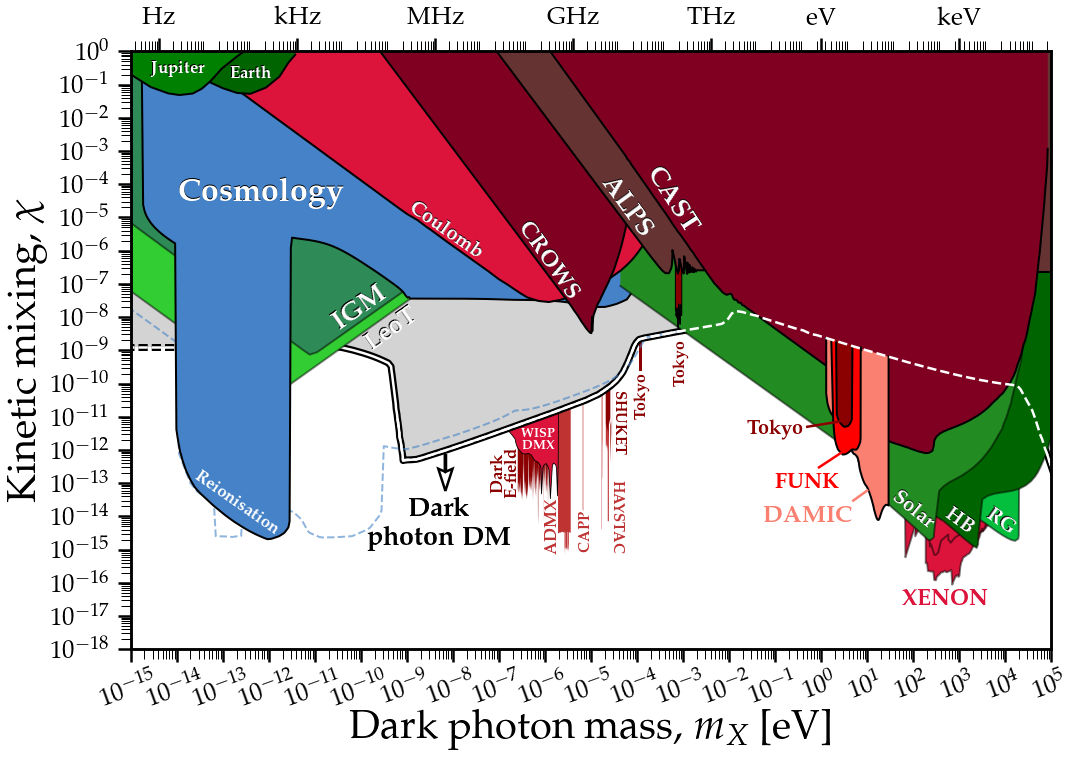

In [67]:
from numpy import *
from numpy.random import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
from matplotlib import colors
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
from scipy.stats import norm
from PlotFuncs import col_alpha,CurvedText
from PlotFuncs import MySaveFig
%matplotlib inline



def FigSetup(xlab=r'Dark photon mass, $m_X$ [eV]',ylab='Kinetic mixing, $\chi$',\
                 g_min = 1.0e-18,g_max = 1.0e0,\
                 m_min = 1.0e-15,m_max = 1e5,\
                 lw=2.5,lfs=40,tfs=25,tickdir='out',\
                 Grid=False,Shape='Rectangular',mathpazo=True,
                 TopAndRightTicks=False,FrequencyAxis=True,UnitAxis=True):

        plt.rcParams['axes.linewidth'] = lw
        plt.rc('text', usetex=True)
        plt.rc('font', family='serif',size=tfs)

        if mathpazo:
            mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']

        if Shape=='Wide':
            fig = plt.figure(figsize=(16.5,5))
        elif Shape=='Rectangular':
            fig = plt.figure(figsize=(16.5,11))

        ax = fig.add_subplot(111)

        ax.set_xlabel(xlab,fontsize=lfs)
        ax.set_ylabel(ylab,fontsize=lfs)

        ax.tick_params(which='major',direction=tickdir,width=2.5,length=13,right=TopAndRightTicks,top=TopAndRightTicks,pad=7)
        ax.tick_params(which='minor',direction=tickdir,width=1,length=10,right=TopAndRightTicks,top=TopAndRightTicks)


        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xlim([m_min,m_max])
        ax.set_ylim([g_min,g_max])

        locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
        locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
        ax.xaxis.set_major_locator(locmaj)
        ax.xaxis.set_minor_locator(locmin)
        ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

        locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
        locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
        ax.yaxis.set_major_locator(locmaj)
        ax.yaxis.set_minor_locator(locmin)
        ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

        if Shape=='Rectangular':
            plt.xticks(rotation=20)

        if Grid:
            ax.grid(zorder=0)

        if FrequencyAxis:
            ax2 = ax.twiny()
            ax2.set_xlim([m_min*241.8*1e12,m_max*241.8*1e12])
            

            
            ax2.set_xscale('log')
            ax2.tick_params(which='major',direction=tickdir,width=2.5,length=13,pad=7)
            ax2.tick_params(which='minor',direction=tickdir,width=1,length=10)
            locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
            locmin = mpl.ticker.LogLocator(base=10.0, subs=arange(2, 10)*.1,numticks=100)
            ax2.xaxis.set_major_locator(locmaj)
            ax2.xaxis.set_minor_locator(locmin)
            ax2.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
            
            ax2.set_xticks([1e0,1e3,1e6,1e9,1e12,1*241.8*1e12,1000*241.8*1e12])
            ax2.set_xticklabels(['Hz','kHz','MHz','GHz','THz','eV','keV'])
            
            plt.sca(ax)



        return fig,ax
    
    
import matplotlib.patheffects as pe
pek=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()]

    
def DarkMatter(ax,col=[0.75, 0.2, 0.2],fs=20,projection=True):
    y2 = ax.get_ylim()[1]
    zo = 0.3
    dat = loadtxt("limit_data/DarkPhoton/DM.txt")
    plt.plot(dat[:,0],dat[:,1],'-',color='w',alpha=1,zorder=zo,lw=2.5,path_effects=pek)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor='lightgray',zorder=zo,alpha=1.0)
    
    plt.plot([1e-16,dat[0,0]],[dat[0,1],dat[0,1]],'--',color='w',alpha=1,zorder=zo,lw=2.5,path_effects=pek)
    plt.fill_between([1e-16,dat[0,0]],[dat[0,1],dat[0,1]],y2=y2,edgecolor=None,facecolor='lightgray',zorder=zo,alpha=1.0)

    plt.plot(dat[40:,0],dat[40:,1],'--',color='w',alpha=1,lw=2.5)
    
    plt.arrow(0.39, 0.37, 0, -0.045, transform=fig.transFigure,figure=fig,
      length_includes_head=True,lw=2.5,
      head_width=0.012, head_length=0.028, overhang=0.13,
      edgecolor='k',facecolor='w',clip_on=False)
    plt.text(0.5e-8,1e-14,r'{\bf Dark}',fontsize=27,ha='center')
    plt.text(0.5e-8,1.5e-15,r'{\bf photon DM}',fontsize=27,ha='center')


    return
    
    
def Haloscopes(ax,col=[0.75, 0.2, 0.2],fs=17,projection=True):
    y2 = ax.get_ylim()[1]
    zo = 0.3
#     dat = loadtxt("limit_data/AxionPhoton/RBF_UF_Haloscopes.txt")
#     dat[:,1] = sqrt((dat[:,1]))/sqrt(0.0025)
#     plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=zo,alpha=1.0)
    
    costh = sqrt(1/3)
    
    
    B = 7.6/1.444e-3 # eV^2
    dat = loadtxt("limit_data/AxionPhoton/ADMX.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)

    dat = loadtxt("limit_data/AxionPhoton/ADMX2018.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)
    
    dat = loadtxt("limit_data/AxionPhoton/ADMX2019_1.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)
    
    dat = loadtxt("limit_data/AxionPhoton/ADMX2019_2.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)
    
    dat = loadtxt("limit_data/AxionPhoton/ADMX_Sidecar.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)

    
    dat = loadtxt("limit_data/AxionPhoton/HAYSTAC.txt")
    B = 9/1.444e-3
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)

    dat = loadtxt("limit_data/AxionPhoton/HAYSTAC_2020.txt")
    B = 9/1.444e-3
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)

    
    dat = loadtxt("limit_data/AxionPhoton/CAPP-8TB.txt")
    B = 8/1.444e-3
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)

    dat = loadtxt("limit_data/AxionPhoton/ORGAN.txt")
    B = 14/1.444e-3
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)
    
    dat = loadtxt("limit_data/AxionPhoton/QUAX.txt")
    B = 8.1/1.444e-3
    dat[:,1] = 1e-9*dat[:,1]*(B/(costh*dat[:,0]))
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.1)

    plt.text(1.5e-6,0.5e-14,r'{\bf ADMX}',fontsize=fs,color=col,rotation=90,rotation_mode='anchor',ha='center',va='center')
    plt.text(0.8e-5,0.35e-14,r'{\bf CAPP}',fontsize=fs-2,color=col,rotation=90,rotation_mode='anchor',ha='center',va='center')
    plt.text(0.35e-4,1e-14,r'{\bf HAYSTAC}',fontsize=fs-2,color=col,rotation=-90,rotation_mode='anchor',ha='center',va='center')

    return
    
    
def StellarBounds(ax,fs=20,text_on=True):
    y2 = ax.get_ylim()[1]
    # Stellar physics constraints

    # Globular clusters 
    HB_col = [0.01, 0.75, 0.24]
    HB = loadtxt("limit_data/DarkPhoton/RG.txt")
    plt.plot(HB[:,0],HB[:,1],color='k',alpha=0.5,zorder=0.9,lw=2)
    plt.fill_between(HB[:,0],HB[:,1],y2=y2,edgecolor=None,facecolor=HB_col,zorder=0.9)

    
    # Globular clusters 
    HB_col = 'DarkGreen'
    HB = loadtxt("limit_data/DarkPhoton/HB.txt")
    plt.plot(HB[:,0],HB[:,1],color='k',alpha=0.5,zorder=0.95,lw=2)
    plt.fill_between(HB[:,0],HB[:,1],y2=y2,edgecolor=None,facecolor=HB_col,zorder=0.95)

    # Solar bound
    Solar_col = 'ForestGreen'
    Solar = loadtxt("limit_data/DarkPhoton/Solar.txt")
    plt.plot(Solar[:,0],Solar[:,1],color='k',alpha=0.5,zorder=1,lw=2)
    plt.fill_between(Solar[:,0],Solar[:,1],y2=y2,edgecolor=None,facecolor=Solar_col,zorder=1)

    
    
#     # SN1987A-neutrinos updated arXiv:[1808.10136]
#     SN = loadtxt("limit_data/AxionPhoton/SN1987A_2019.txt")
#     plt.fill_between(SN[:,0],SN[:,1],y2=y2,edgecolor=None,facecolor='ForestGreen',zorder=0.1)
#     # SN1987A-decay arXiv:[1702.02964]
#     SN = loadtxt("limit_data/AxionPhoton/SN1987A_decay.txt")
#     plt.fill_between(SN[:,0],SN[:,1],y2=y2,edgecolor=None,facecolor='ForestGreen',zorder=0.1)

    if text_on:
        plt.text(1e2*(1-0.01),1.5e-14*(1+0.05),r'{\bf Solar}',fontsize=fs,color='k',rotation=-39,rotation_mode='anchor',ha='center',va='center')
        plt.text(1e3*(1-0.01),0.7e-14*(1+0.05),r'{\bf HB}',fontsize=fs,color='k',rotation=-36,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.8e4*(1-0.01),0.7e-14*(1+0.05),r'{\bf RG}',fontsize=fs,color='k',rotation=-35,rotation_mode='anchor',ha='center',va='center')
        plt.text(1e2,1.5e-14,r'{\bf Solar}',fontsize=fs,color='w',rotation=-39,rotation_mode='anchor',ha='center',va='center')
        plt.text(1e3,0.7e-14,r'{\bf HB}',fontsize=fs,color='w',rotation=-36,rotation_mode='anchor',ha='center',va='center')
        plt.text(0.8e4,0.7e-14,r'{\bf RG}',fontsize=fs,color='w',rotation=-35,rotation_mode='anchor',ha='center',va='center')
        return

    
def Xenon(ax,col='crimson',fs=23):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/Xenon1T.txt")
    plt.plot(1e3*dat[:,0],dat[:,1],color='k',alpha=0.5,zorder=0.5,lw=2)
    plt.fill_between(1e3*dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.5)
    
    dat = loadtxt("limit_data/DarkPhoton/Xenon100.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=0.5,zorder=0.5,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.5)
   
    plt.text(5e2,3e-17,r'{\bf XENON}',fontsize=fs,color=col,rotation=0,rotation_mode='anchor',ha='center',va='center')
    
    return

def DAMIC(ax,col='salmon',fs=24):
    m1,y1 = loadtxt("limit_data/DarkPhoton/DM.txt",unpack=True)
    dat = loadtxt("limit_data/DarkPhoton/DAMIC.txt")
    y2 = interp(dat[:,0],m1,y1)
    dat[0,1] = y2[0]
    dat[-1,1] = y2[-1]
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.2,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.2)
    plt.text(5e-1,1e-14,r'{\bf DAMIC}',fontsize=fs,color=col,rotation=0,rotation_mode='anchor',ha='center',va='center')
    plt.plot([5e0,1e1],[3e-14,6e-14],'k-',lw=2.5,color=col)
    return


def FUNK(ax,col='red',fs=22):
    m1,y1 = loadtxt("limit_data/DarkPhoton/DM.txt",unpack=True)
    dat = loadtxt("limit_data/DarkPhoton/FUNK.txt")
    y2 = interp(dat[:,0],m1,y1)
    dat[0,1] = y2[0]/1.1
    dat[-1,1] = y2[-1]/1.1
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.3,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.3)
    plt.text(5e-1,1e-13,r'{\bf FUNK}',fontsize=fs,color=col,rotation=0,rotation_mode='anchor',ha='center',va='center')
    plt.plot([9e-1,3e0],[3e-13,9e-13],'k-',lw=2.5,color=col)
    return


def Tokyo(ax,col='darkred',fs=16):
    m1,y1 = loadtxt("limit_data/DarkPhoton/DM.txt",unpack=True)
    dat = loadtxt("limit_data/DarkPhoton/Tokyo-Dish.txt")
    y2 = interp(dat[:,0],m1,y1)
    dat[0,1] = y2[0]/1.1
    dat[-1,1] = y2[-1]/1.1
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.4,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.4)

    
    dat = loadtxt("limit_data/DarkPhoton/Tokyo-Knirck.txt")
    plt.fill_between(dat[:,0],dat[:,1],y2=1e0,edgecolor='k',facecolor=col,zorder=1.09)
    
    dat = loadtxt("limit_data/DarkPhoton/Tokyo-Tomita.txt")
    plt.plot([dat[1,0],dat[1,0]],[dat[1,1],1e0],'-',color=col,lw=3,zorder=0.2)
    
    plt.text(1.3e-4,4e-11,r'{\bf Tokyo}',fontsize=fs,color=col,rotation=90,rotation_mode='anchor',ha='center',va='center')
    plt.text(0.9e-3,4e-10,r'{\bf Tokyo}',fontsize=fs,color=col,rotation=90,rotation_mode='anchor',ha='center',va='center')
    plt.text(1e-1,4e-12,r'{\bf Tokyo}',fontsize=fs+4,color=col,rotation=0,rotation_mode='anchor',ha='center',va='center')
    plt.plot([5e-1,4e0],[5e-12,8e-12],'-',lw=2.5,color=col)
    return
    
    

def Coulomb(ax,col='crimson',fs=20):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/Coulomb.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.07,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.07)
    plt.text(0.7e-8*(1-0.01),4e-6*(1+0.05),r'{\bf Coulomb}',fontsize=fs,color='k',rotation=-35,rotation_mode='anchor',ha='center',va='center')
    plt.text(0.7e-8,4e-6,r'{\bf Coulomb}',fontsize=fs,color='w',rotation=-35,rotation_mode='anchor',ha='center',va='center')
    return

def CROWS(ax,col=[0.5, 0.0, 0.13],fs=23):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/CROWS.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.08,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.08)
    plt.text(1.2e-6*(1-0.01),5e-7*(1+0.05),r'{\bf CROWS}',fontsize=fs,color='k',rotation=-55,rotation_mode='anchor',ha='center',va='center')
    plt.text(1.2e-6,5e-7,r'{\bf CROWS}',fontsize=fs,color='w',rotation=-55,rotation_mode='anchor',ha='center',va='center')
    return

def LSW(ax,col=[0.4, 0.2, 0.2],fs=27):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/LSW.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.09,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.09)
    plt.text(0.6e-4*(1-0.02),2e-5*(1+0.08),r'{\bf ALPS}',fontsize=fs,color='k',rotation=-54,rotation_mode='anchor',ha='center',va='center')
    plt.text(0.6e-4,2e-5,r'{\bf ALPS}',fontsize=fs,color='w',rotation=-54,rotation_mode='anchor',ha='center',va='center')

    return

def Cosmology(ax,col=[0.27, 0.51, 0.78],fs=32):
    y2 = ax.get_ylim()[1]
    
    dat = loadtxt("limit_data/DarkPhoton/Cosmology_combined_Witte.txt")
    plt.plot(dat[:,0],dat[:,1],'--',color=col,alpha=0.6,zorder=0.5,lw=2)
    
    dat = loadtxt("limit_data/DarkPhoton/Cosmology_combined.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=0.5,lw=2)
    

    
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.5)
    plt.text(0.7e-12*(1-0.02),5e-5*(1+0.08),r'{\bf Cosmology}',fontsize=fs,color='k',rotation=0,rotation_mode='anchor',ha='center',va='center')
    plt.text(0.7e-12,5e-5,r'{\bf Cosmology}',fontsize=fs,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')
    plt.text(2e-13,2.5e-14,r'{\bf Reionisation}',fontsize=fs-15,color='w',rotation=-35,rotation_mode='anchor',ha='center',va='center')
    return


def Jupiter(ax,col='Green',fs=17):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/Jupiter.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=2,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=2)
    plt.text(1e-14*(1-0.02),3e-1*(1+0.07),r'{\bf Jupiter}',fontsize=fs,color='k',rotation=0,rotation_mode='anchor',ha='center',va='center')
    plt.text(1e-14,3e-1,r'{\bf Jupiter}',fontsize=fs,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')
    return

def Earth(ax,col='DarkGreen',fs=17):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/Earth.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.9,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.9)
    plt.text(4e-13*(1-0.01),2e-1*(1+0.05),r'{\bf Earth}',fontsize=fs,color='k',rotation=0,rotation_mode='anchor',ha='center',va='center')
    plt.text(4e-13,2e-1,r'{\bf Earth}',fontsize=fs,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')
    return

def CAST(ax,col=[0.5, 0.0, 0.13],fs=27):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/CAST.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=1.1,lw=2)
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=1.1)
    plt.text(0.6e-3*(1-0.01),0.3e-4*(1+0.08),r'{\bf CAST}',fontsize=fs,color='k',rotation=-57,rotation_mode='anchor',ha='center',va='center')
    plt.text(0.6e-3,0.3e-4,r'{\bf CAST}',fontsize=fs,color='w',rotation=-57,rotation_mode='anchor',ha='center',va='center')
    return


def SHUKET(ax,col='darkred',fs=15):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/SHUKET.txt")
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.2)
    plt.text(4e-5,7e-12,r'{\bf SHUKET}',fontsize=fs,color=col,rotation=-90,rotation_mode='anchor',ha='center',va='center')
    return

def DarkEfield(ax,col='darkred',fs=17):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/DarkEfield.txt")
    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.2)
    plt.text(1e-7,0.2e-12,r'{\bf Dark}',fontsize=fs,color=col,rotation=90,rotation_mode='anchor',ha='center',va='center')
    plt.text(2e-7,0.2e-12,r'{\bf E-field}',fontsize=fs,color=col,rotation=90,rotation_mode='anchor',ha='center',va='center')

    return


def IGM(ax,col='seagreen',fs=27):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/IGM.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=0.5,zorder=0.49,lw=2)

    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.49)
    
    plt.text(1e-10*(1-0.05),0.2e-7*(1+0.07),r'{\bf IGM}',fontsize=fs,color='k',rotation=35,rotation_mode='anchor',ha='center',va='center')
    plt.text(1e-10,0.2e-7,r'{\bf IGM}',fontsize=fs,color='w',rotation=35,rotation_mode='anchor',ha='center',va='center')

    return



def LeoT(ax,col='limegreen',fs=25):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/LeoT.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=0.48,zorder=0.48,lw=2)

    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.48)
    
    plt.text(5e-10*(1-0.07),0.4e-8*(1+0.07),r'{\bf LeoT}',fontsize=fs,color='k',rotation=35,rotation_mode='anchor',ha='center',va='center')
    plt.text(5e-10,0.4e-8,r'{\bf LeoT}',fontsize=fs,color='w',rotation=35,rotation_mode='anchor',ha='center',va='center')

    return


def WISPDMX(ax,col='crimson',fs=13):
    y2 = ax.get_ylim()[1]
    dat = loadtxt("limit_data/DarkPhoton/WISPDMX.txt")
    plt.plot(dat[:,0],dat[:,1],color='k',alpha=1,zorder=0.2,lw=0.8)

    plt.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=col,zorder=0.2)
    plt.text(7e-7,3.2e-12,r'{\bf WISP}',fontsize=fs,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')
    plt.text(7e-7,1.3e-12,r'{\bf DMX}',fontsize=fs,color='w',rotation=0,rotation_mode='anchor',ha='center',va='center')

    return

fig,ax = FigSetup()

DarkMatter(ax)
Haloscopes(ax)
StellarBounds(ax)

Xenon(ax)
DAMIC(ax)
FUNK(ax)
Tokyo(ax)
SHUKET(ax)
DarkEfield(ax)
WISPDMX(ax)
Coulomb(ax)
CROWS(ax)


Cosmology(ax)
LSW(ax)
CAST(ax)
Jupiter(ax)
Earth(ax)
IGM(ax)
LeoT(ax)

MySaveFig(fig,'DarkPhoton')